# TP02 - Classificação com SVM

## Dataset: Titanic

## Questão 1: Preparação e Transformação dos Dados

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic_data.csv')
print(f"Shape inicial: {df.shape}")
df.head()

Shape inicial: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
print(f"Shape após eliminar colunas: {df.shape}")

Shape após eliminar colunas: (891, 8)


In [4]:
print(f"NAs antes: {df.isna().sum().sum()}")
df = df.dropna()
print(f"Shape após eliminar NAs: {df.shape}")

NAs antes: 179
Shape após eliminar NAs: (712, 8)


In [5]:
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

print("Valores únicos após encoding:")
print(f"Sex: {df['Sex'].unique()}")
print(f"Embarked: {df['Embarked'].unique()}")

Valores únicos após encoding:
Sex: [1 0]
Embarked: [2 0 1]


In [6]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Treino: {X_train.shape}")
print(f"Teste: {X_test.shape}")

Treino: (534, 7)
Teste: (178, 7)


In [7]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
print("Modelo SVM com kernel linear treinado!")

Modelo SVM com kernel linear treinado!


## Questão 2: Matriz de Confusão e Métricas (Kernel Linear)

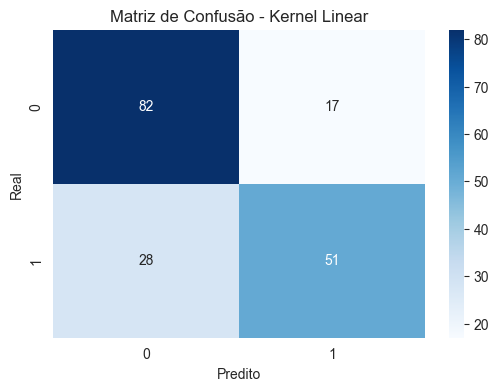

In [8]:
cm_linear = confusion_matrix(y_test, y_pred_linear)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Kernel Linear')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

In [9]:
acc_linear = accuracy_score(y_test, y_pred_linear)
prec_linear = precision_score(y_test, y_pred_linear)
rec_linear = recall_score(y_test, y_pred_linear)
f1_linear = f1_score(y_test, y_pred_linear)

print("Métricas - Kernel Linear:")
print(f"Acurácia: {acc_linear:.4f}")
print(f"Precision: {prec_linear:.4f}")
print(f"Recall: {rec_linear:.4f}")
print(f"F1-Score: {f1_linear:.4f}")

Métricas - Kernel Linear:
Acurácia: 0.7472
Precision: 0.7500
Recall: 0.6456
F1-Score: 0.6939


## Questão 3: Modelos com Kernels RBF e Sigmoid

### Kernel RBF

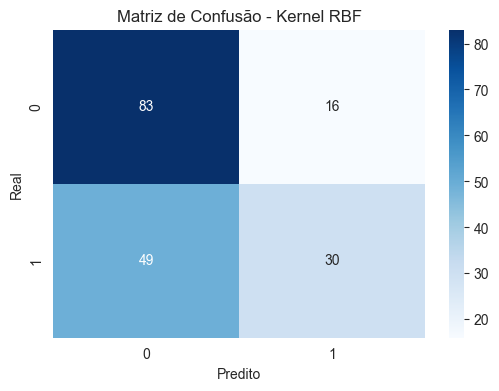

In [10]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

cm_rbf = confusion_matrix(y_test, y_pred_rbf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Kernel RBF')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

In [11]:
acc_rbf = accuracy_score(y_test, y_pred_rbf)
prec_rbf = precision_score(y_test, y_pred_rbf)
rec_rbf = recall_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)

print("Métricas - Kernel RBF:")
print(f"Acurácia: {acc_rbf:.4f}")
print(f"Precision: {prec_rbf:.4f}")
print(f"Recall: {rec_rbf:.4f}")
print(f"F1-Score: {f1_rbf:.4f}")

Métricas - Kernel RBF:
Acurácia: 0.6348
Precision: 0.6522
Recall: 0.3797
F1-Score: 0.4800


### Kernel Sigmoid

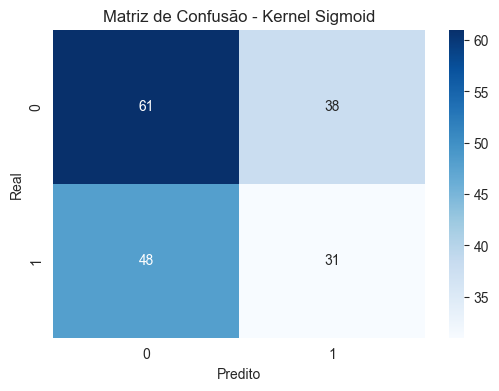

In [12]:
svm_sigmoid = SVC(kernel='sigmoid', random_state=42)
svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)

cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_sigmoid, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Kernel Sigmoid')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

In [13]:
acc_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
prec_sigmoid = precision_score(y_test, y_pred_sigmoid)
rec_sigmoid = recall_score(y_test, y_pred_sigmoid)
f1_sigmoid = f1_score(y_test, y_pred_sigmoid)

print("Métricas - Kernel Sigmoid:")
print(f"Acurácia: {acc_sigmoid:.4f}")
print(f"Precision: {prec_sigmoid:.4f}")
print(f"Recall: {rec_sigmoid:.4f}")
print(f"F1-Score: {f1_sigmoid:.4f}")

Métricas - Kernel Sigmoid:
Acurácia: 0.5169
Precision: 0.4493
Recall: 0.3924
F1-Score: 0.4189


## Questão 4: Comparação dos Modelos

In [14]:
resultados = pd.DataFrame({
    'Kernel': ['Linear', 'RBF', 'Sigmoid'],
    'Acurácia': [acc_linear, acc_rbf, acc_sigmoid],
    'Precision': [prec_linear, prec_rbf, prec_sigmoid],
    'Recall': [rec_linear, rec_rbf, rec_sigmoid],
    'F1-Score': [f1_linear, f1_rbf, f1_sigmoid]
})

resultados = resultados.round(4)
resultados

,Kernel,Acurácia,Precision,Recall,F1-Score
0,Linear,0.7472,0.7500,0.6456,0.6939
1,RBF,0.6348,0.6522,0.3797,0.4800
2,Sigmoid,0.5169,0.4493,0.3924,0.4189


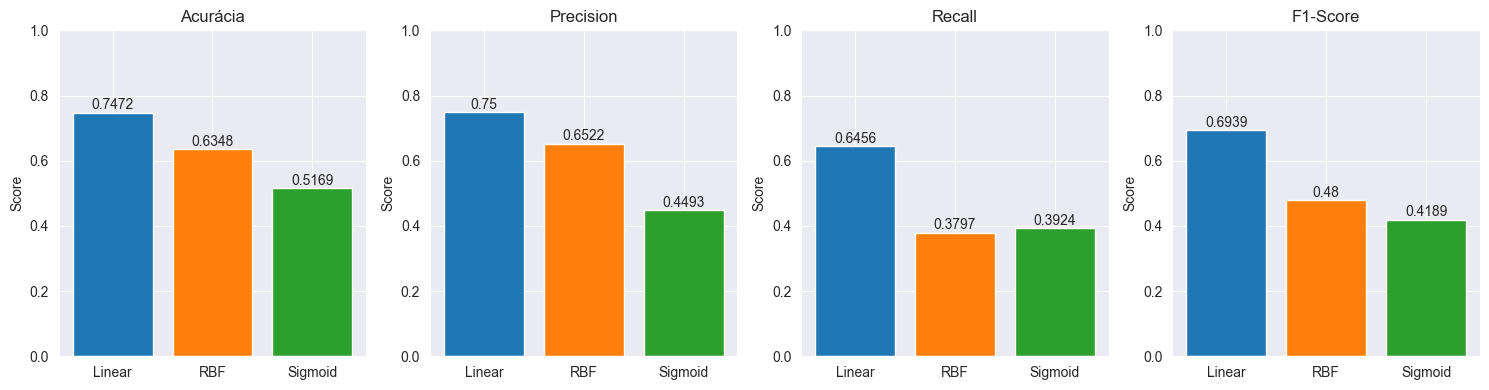

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

metricas = ['Acurácia', 'Precision', 'Recall', 'F1-Score']
cores = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, metrica in enumerate(metricas):
    axes[i].bar(resultados['Kernel'], resultados[metrica], color=cores)
    axes[i].set_title(metrica)
    axes[i].set_ylim([0, 1])
    axes[i].set_ylabel('Score')
    
    for j, v in enumerate(resultados[metrica]):
        axes[i].text(j, v + 0.01, str(v), ha='center')

plt.tight_layout()
plt.show()

## Análise dos Resultados

Com base nos experimentos realizados com o dataset Titanic (712 amostras após limpeza, 178 amostras de teste), obtivemos os seguintes resultados:

### Desempenho por Kernel:

1. **Kernel Linear**: 
   - Acurácia: 74.72%
   - Precision: 75.00%
   - Recall: 64.56%
   - F1-Score: 69.39%
   - Melhor desempenho geral com boa capacidade de separação linear dos dados

2. **Kernel RBF**:
   - Acurácia: 63.48%
   - Precision: 65.22%
   - Recall: 37.97%
   - F1-Score: 48.00%
   - Performance inferior ao linear, indicando que os dados têm natureza mais linear

3. **Kernel Sigmoid**:
   - Acurácia: 51.69%
   - Precision: 44.93%
   - Recall: 39.24%
   - F1-Score: 41.89%
   - Pior desempenho, próximo ao aleatório

### Melhor Modelo: Kernel Linear

O **kernel linear** apresentou o melhor desempenho com:
- Maior acurácia (74.72%)
- Melhor F1-Score (69.39%), indicando melhor balanço entre precision e recall
- Maior consistência entre todas as métricas
- Identificou corretamente 133 dos 178 passageiros (82 não-sobreviventes e 51 sobreviventes)

### Conclusão

Para o dataset Titanic, o kernel linear é o mais adequado, sugerindo que a relação entre as features (classe, sexo, idade, etc.) e a sobrevivência é predominantemente linear. O modelo consegue capturar bem os padrões principais como "mulheres e crianças primeiro" sem necessidade de transformações não-lineares complexas.